In [1]:
library(SpaMTP) #This is a custom package that has been downloaded from: devtools::install_github("agc888/SpaMTP")

#General Libraries
library(Cardinal)
library(Seurat)

#For plotting + DE plots
library(ggplot2)
library(EnhancedVolcano)

#For Correlation Analysis
library(Hmisc)
library(corrplot)
library(cowplot)

#For Deconvolution Analysis
library(CARD)
library(MuSiC)

Loading required package: ProtGenerics


Attaching package: ‘ProtGenerics’


The following object is masked from ‘package:stats’:

    smooth


Loading required package: BiocGenerics


Attaching package: ‘BiocGenerics’


The following objects are masked from ‘package:stats’:

    IQR, mad, sd, var, xtabs


The following objects are masked from ‘package:base’:

    anyDuplicated, aperm, append, as.data.frame, basename, cbind,
    colnames, dirname, do.call, duplicated, eval, evalq, Filter, Find,
    get, grep, grepl, intersect, is.unsorted, lapply, Map, mapply,
    match, mget, order, paste, pmax, pmax.int, pmin, pmin.int,
    Position, rank, rbind, Reduce, rownames, sapply, setdiff, sort,
    table, tapply, union, unique, unsplit, which.max, which.min


Loading required package: BiocParallel

Loading required package: EBImage

Loading required package: S4Vectors

Loading required package: stats4


Attaching package: ‘S4Vectors’


The following object is masked from ‘package:utils’:

  

In [2]:
### Specifiy data directory paths where data is stored

DATA_DIR <- "/QRISdata/Q1851/Andrew_C/Xenium_Brain/2023.12.07 Xenium+MALDI/MALDI imzml file/"
OUT_DIR  <- "/QRISdata/Q1851/Andrew_C/Metabolomics/MedulaBlastoma/DHP/"

In [3]:
C1 <- Cardinal::readImzML("dhb-tissue region control 1",folder = DATA_DIR, mass.range = c(160,1500), resolution = 10)
T1 <- Cardinal::readImzML("dhb-tissue region treated 1",folder = DATA_DIR, mass.range = c(160,1500), resolution = 10)
C2 <- Cardinal::readImzML("dhb-tissue region control 2",folder = DATA_DIR, mass.range = c(160,1500), resolution = 10)
T2 <- Cardinal::readImzML("dhb-tissue region treated 2",folder = DATA_DIR, mass.range = c(160,1500), resolution = 10)

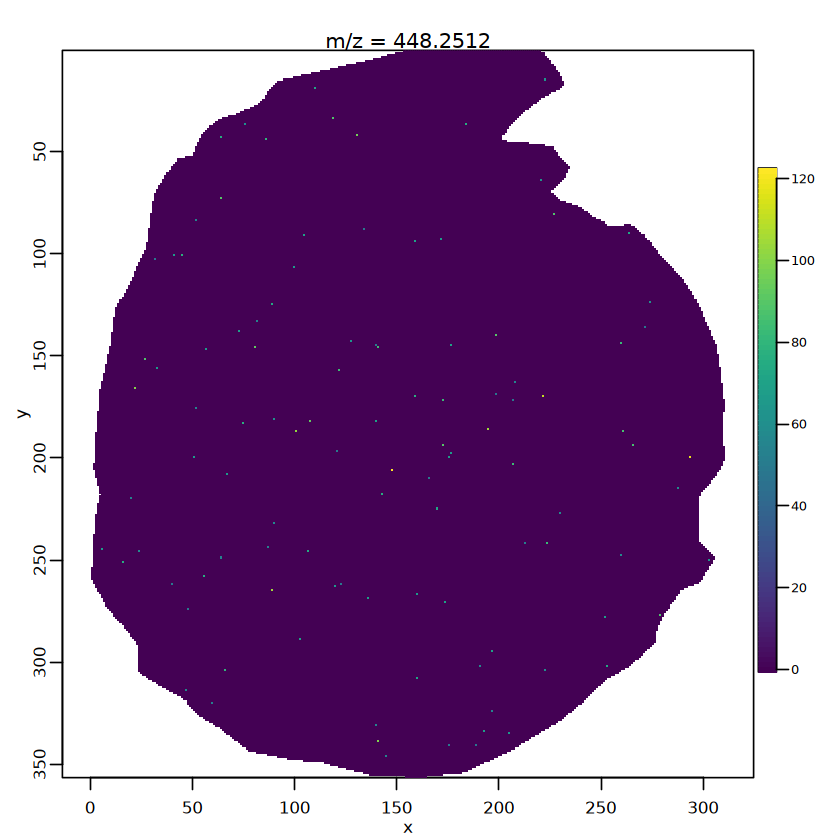

In [5]:
image(C1, mz = 448.25)

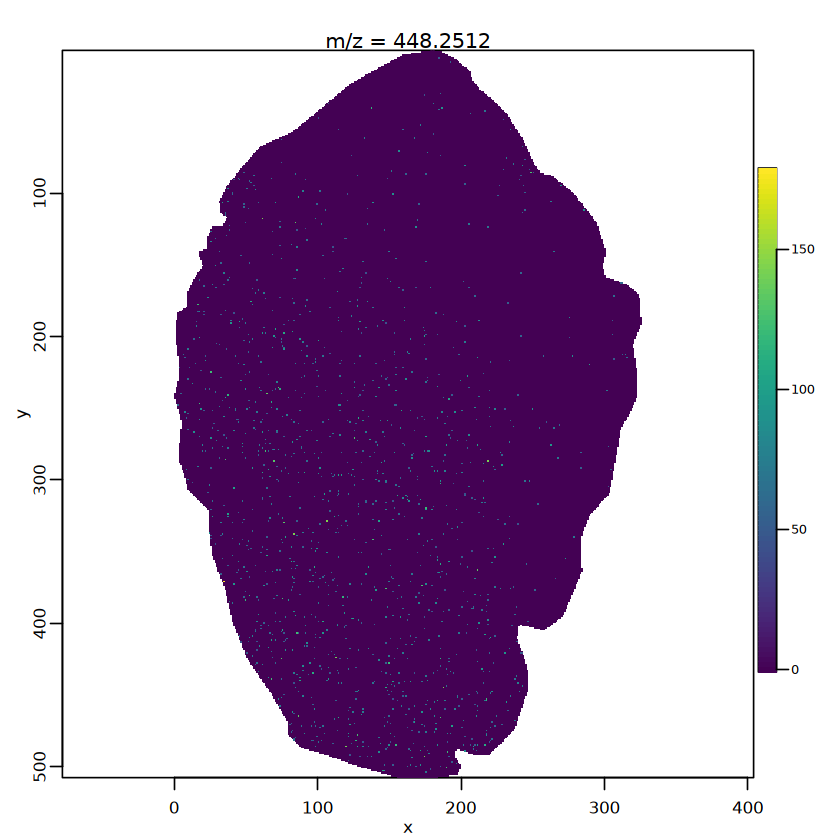

In [6]:
image(T1, mz = 448.25)

In [8]:
data <- SpaMTP::MergeCardinalData(list(C1, T1, C2, T2), shift.image = FALSE)

Setting Centroids as TRUE ...... 



In [10]:
C1_seurat <- CardinalToSeurat(data,"dhb-tissue region control 1")
T1_seurat <- CardinalToSeurat(data,"dhb-tissue region treated 1")
C2_seurat <- CardinalToSeurat(data,"dhb-tissue region control 2")
T2_seurat <- CardinalToSeurat(data,"dhb-tissue region treated 2")

Convering Cardinal object to Seurat object .... 

Generating Seurat Barcode Labels from Pixel Coordinates .... 

Constructing Seurat Object ....

Warning message:
“Data is of class matrix. Coercing to dgCMatrix.”
Adding Pixel Metadata ....

Creating Centroids for Spatial Seurat Object ....

Convering Cardinal object to Seurat object .... 

Generating Seurat Barcode Labels from Pixel Coordinates .... 

Constructing Seurat Object ....

Warning message:
“Data is of class matrix. Coercing to dgCMatrix.”
Adding Pixel Metadata ....

Creating Centroids for Spatial Seurat Object ....

Convering Cardinal object to Seurat object .... 

Generating Seurat Barcode Labels from Pixel Coordinates .... 

Constructing Seurat Object ....

Warning message:
“Data is of class matrix. Coercing to dgCMatrix.”
Adding Pixel Metadata ....

Creating Centroids for Spatial Seurat Object ....

Convering Cardinal object to Seurat object .... 

Generating Seurat Barcode Labels from Pixel Coordinates .... 

Constructin

In [11]:
saveRDS(C1_seurat, "/QRISdata/Q1851/Andrew_C/Xenium_Brain/C1_seurat.RDS")
saveRDS(C2_seurat, "/QRISdata/Q1851/Andrew_C/Xenium_Brain/C2_seurat.RDS")
saveRDS(T1_seurat, "/QRISdata/Q1851/Andrew_C/Xenium_Brain/T1_seurat.RDS")
saveRDS(T2_seurat, "/QRISdata/Q1851/Andrew_C/Xenium_Brain/T2_seurat.RDS")

In [4]:
C1_seurat <- readRDS("/QRISdata/Q1851/Andrew_C/Xenium_Brain/C1_seurat.RDS")
C2_seurat <- readRDS("/QRISdata/Q1851/Andrew_C/Xenium_Brain/C2_seurat.RDS")
T1_seurat <- readRDS("/QRISdata/Q1851/Andrew_C/Xenium_Brain/T1_seurat.RDS")
T2_seurat <- readRDS("/QRISdata/Q1851/Andrew_C/Xenium_Brain/T2_seurat.RDS")

In [6]:
C1_seurat <- NormalizeSeuratData(C1_seurat)

Normalizing layer: counts



In [7]:
C2_seurat <- NormalizeSeuratData(C2_seurat)

Normalizing layer: counts



In [8]:
T1_seurat <- NormalizeSeuratData(T1_seurat)

Normalizing layer: counts



In [9]:
T2_seurat <- NormalizeSeuratData(T2_seurat)

Normalizing layer: counts



In [ ]:
all_data <- merge(T1_seurat, y=list(C1_seurat,T2_seurat,C2_seurat), merge.data = TRUE)

Warning message:
“Some cell names are duplicated across objects provided. Renaming to enforce unique cell names.”


In [4]:
all_data_annotated <- AnnotateSeuratMALDI(all_data, HMDB_db)

Filtering 'HMDB_db' database by M+H adduct/s

Searching database against input m/z's to return annotaiton results

Adding annotations to Seurat Object .... 

Warning message:
“Setting row names on a tibble is deprecated.”
Returning Seurat object that include ONLY SUCCESSFULLY ANNOTATED m/z features

Warning message:
“Not validating Centroids objects”
Warning message:
“Not validating Centroids objects”
Warning message:
“Not validating FOV objects”
Warning message:
“Not validating FOV objects”
Warning message:
“Not validating FOV objects”
Warning message:
“Not validating Seurat objects”
Warning message:
“Not validating Centroids objects”
Warning message:
“Not validating Centroids objects”
Warning message:
“Not validating FOV objects”
Warning message:
“Not validating FOV objects”
Warning message:
“Not validating FOV objects”
Warning message:
“Not validating Seurat objects”
Warning message:
“Not validating Centroids objects”
Warning message:
“Not validating Centroids objects”
Warning messa

In [5]:
SearchAnnotations(all_data_annotated, metabolite = "Palbociclib")

,raw_mz,mz_names,observed_mz,all_IsomerNames,all_Isomers
,<dbl>,<chr>,<chr>,<chr>,<chr>
103018,448.2467,mz-448.246729024761,448.246729024761,Palbociclib,HMDB0256084


In [5]:
1

[1] 1

Scale for fill is already present.
Adding another scale for fill, which will replace the existing scale.
Scale for fill is already present.
Adding another scale for fill, which will replace the existing scale.
Scale for fill is already present.
Adding another scale for fill, which will replace the existing scale.
Scale for fill is already present.
Adding another scale for fill, which will replace the existing scale.


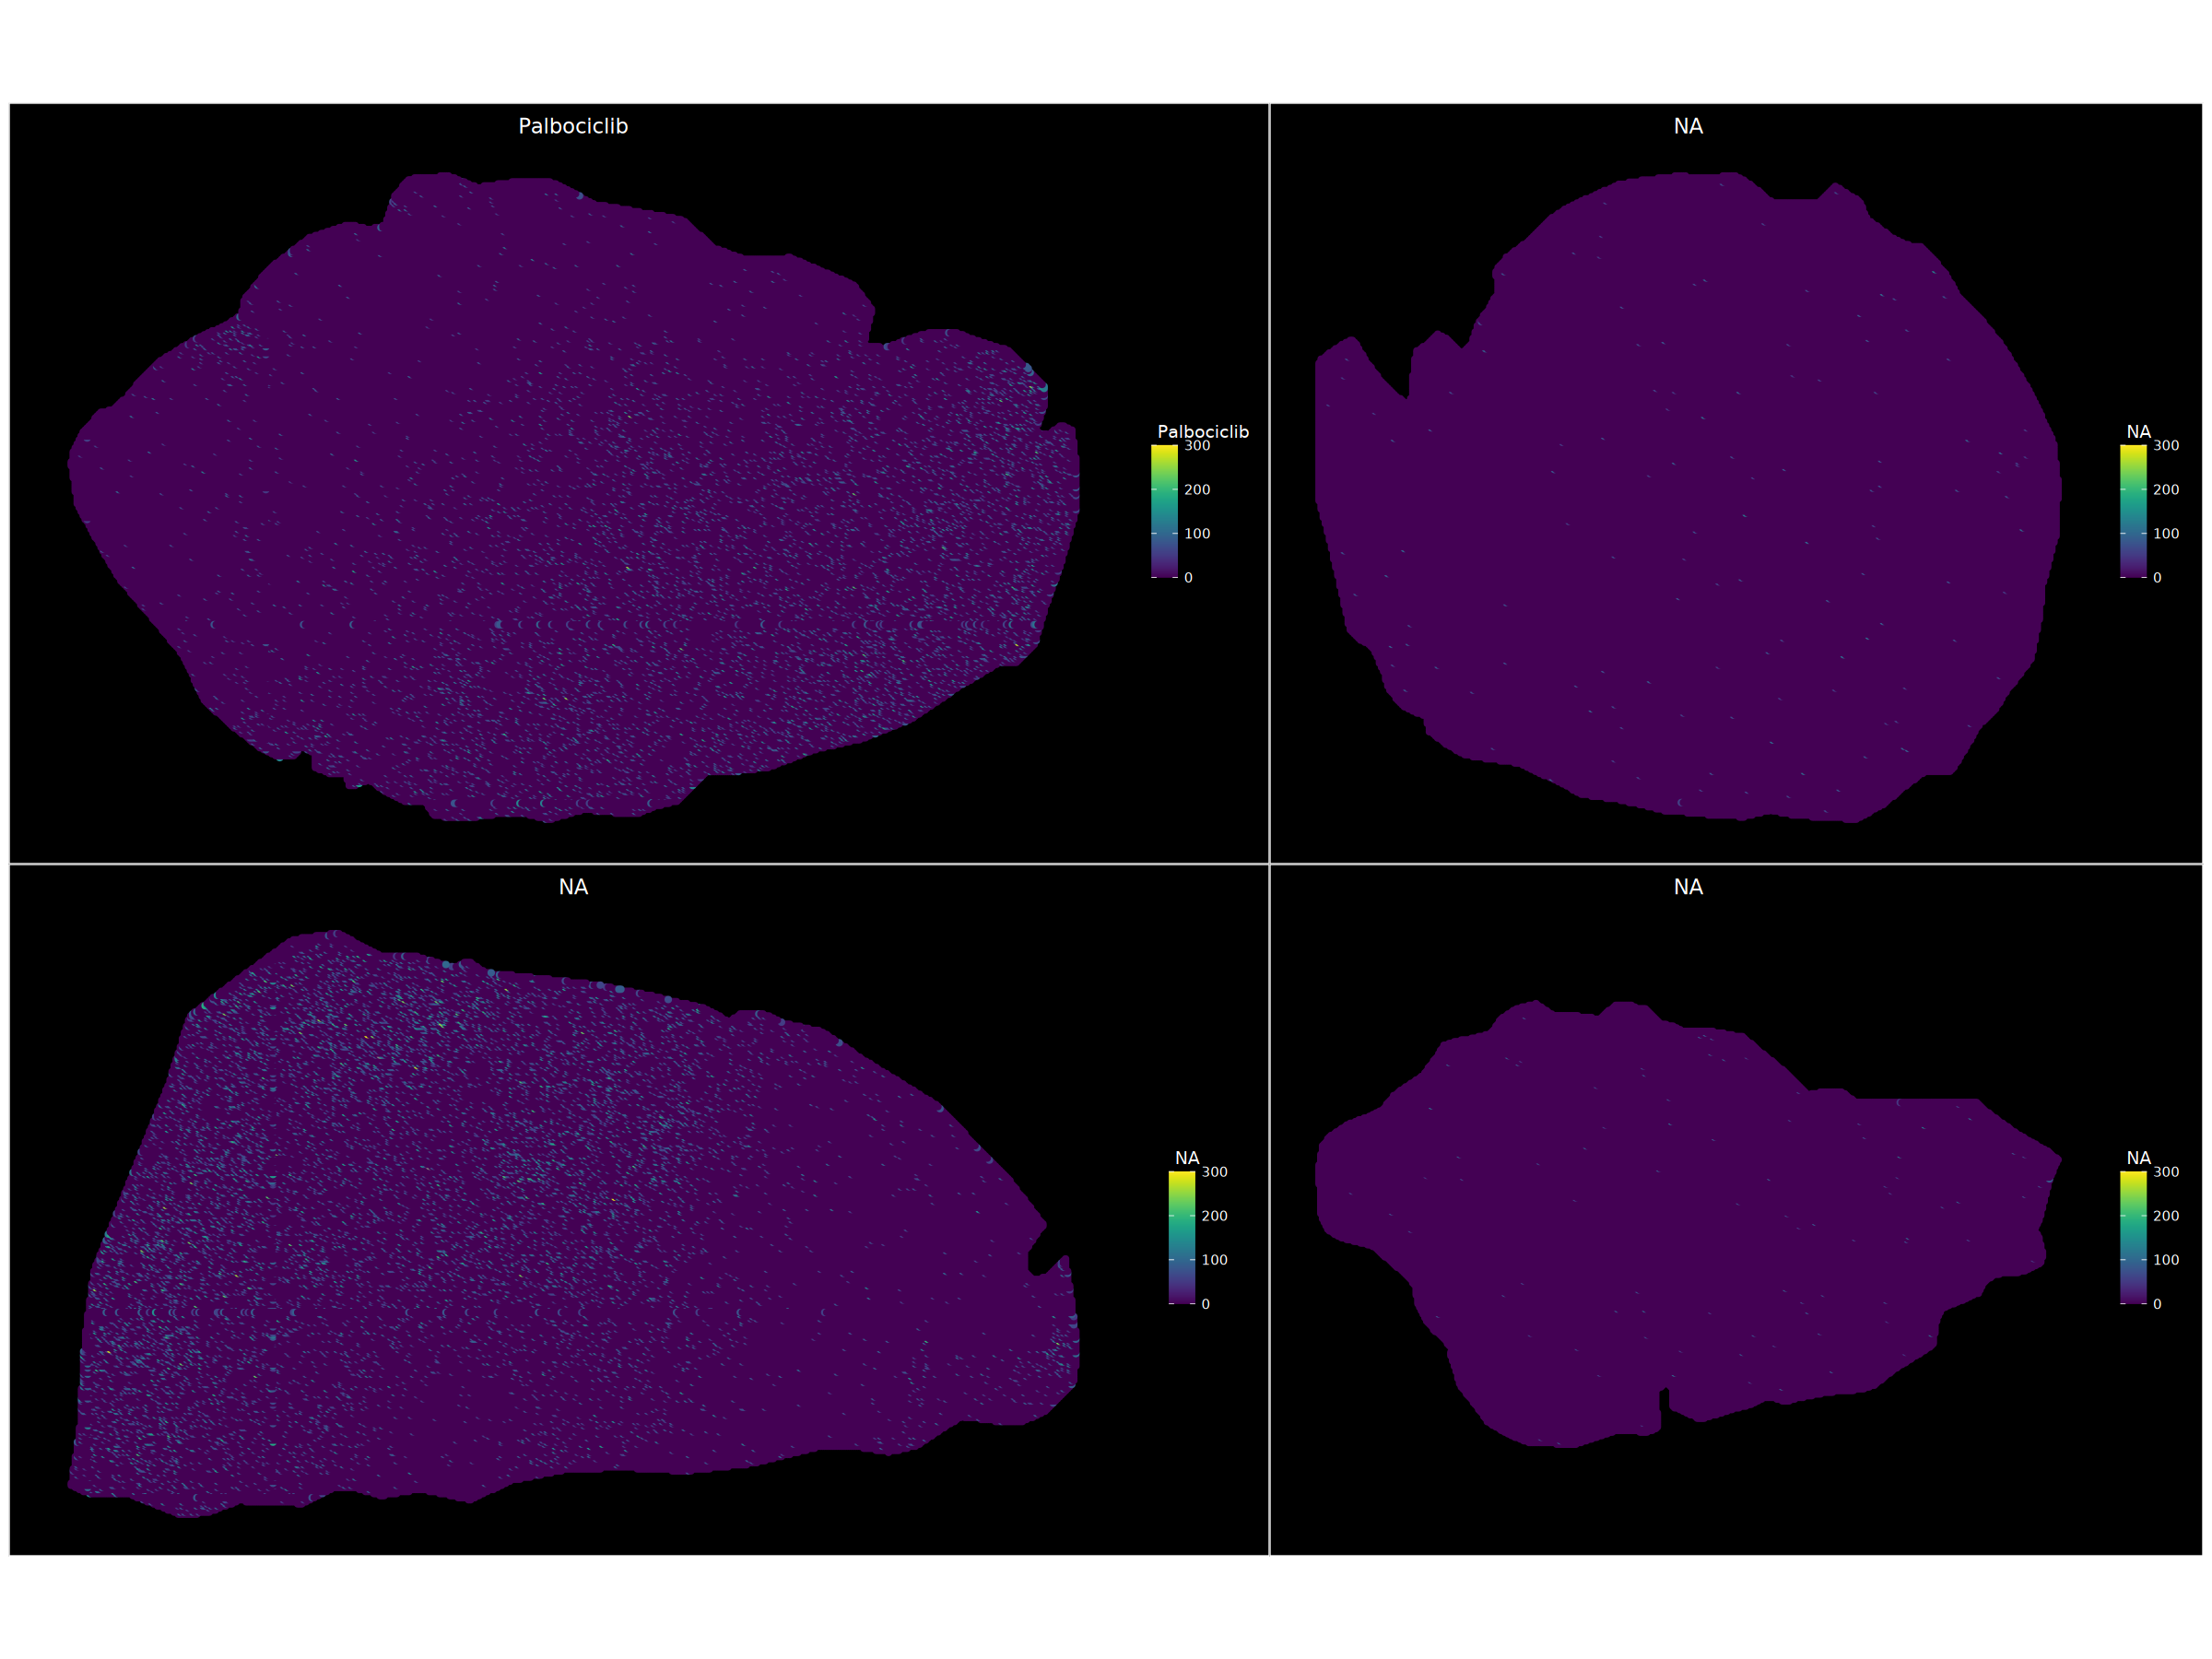

In [13]:
options(repr.plot.width = 20, repr.plot.height = 15)

all_data_annotated@assays$Spatial$data <- all_data_annotated@assays$Spatial$counts
ImageMZAnnotationPlot(all_data_annotated, fov = c( "fov", "fov.2", "fov.3", "fov.4"), metabolites = "Palbociclib", size = 2)&scale_fill_gradientn(colors = viridis(600),  limits = c(0,300))

In [ ]:
"/QRISdata/Q5291/MS_Spatial_metabolomics/10. Data/"

In [ ]:
###' Loads Xenium data and creates a Xenium Seurat object
###' 
###' -----------------------------------------------------------------------------
###' Inputs:
###'        @param(character):    sample -> A string representing the samples name
###'
###' Returns:
###'        @returns(Seurat):     returns a Seurat Xenium Object
###'

load_xenium <- function(sample){
    xenium_data <- LoadXenium(paste0(IMPORT_DIR,"output-XETG00114__",sample,"__20230906__060936/"), fov = "fov")
    return(xenium_data)
}

sample_list <- c("0006896__CA_1h",
"0006896__CA_24h",
"0006896__CA_N",
"0006896__CS_1h",
"0006896__CS_24h",
"0006896__CS_N",
"0006896__FI_1h",
"0006896__FI_24h",
"0006896__FI_N",
"0006897__CM_1h",
"0006897__CM_24h",
"0006897__CM_N",
"0006897__DM_1h",
"0006897__DM_24h",
"0006897__DM_N",
"0006897__JH_1h",
"0006897__JH_24h",
"0006897__JH_N")

xen_data <- list()

for (sample in sample_list){
    suppressWarnings({
    data <- load_xenium(sample)
    sample_name <- strsplit(sample, "__")[[1]][2] ### Simplifies sample name
    Idents(data) <- sample_name
    xen_data <- c(xen_data, setNames(list(data), sample_name))
    })
}